In [1]:
#IMPORTAMOS TODAS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log
from scipy.stats import linregress
%matplotlib inline

In [29]:
#CARGAMOS LOS DATOS
primary_df = pd.read_csv("6e.csv")
secondary_df = pd.read_csv("4ESO.csv")

In [30]:
#ELIMINAREMOS TODAS LAS COLUMNAS Y NOS QUEDAREMOS ÚNICAMENTE CON LAS QUE TRABAJAREMOS
columna_a_conservar_prim = ["ANY","PCAT","PCAST","PANG","PMAT","PMED","MES_NAIXEMENT"]
columna_a_conservar_sec = ["ANY","PCAT","PCAST","PANG","PMAT","PCIEN","MES_NAIXEMENT"]

primary_df = primary_df[columna_a_conservar_prim]
secondary_df = secondary_df[columna_a_conservar_sec]

#PARA NUESTRA COMODIDAD RENOMBRAREMOS PMED COMO PCIEN. SI EJECUTANDO ESTA CELL DA ERROR ES PORQUE TRATARÁ DE CAMBIAR 
#UNA COLUMNA QUE NO EXISTE. CARGA LA CELL ANTERIOR DE NUEVO Y PRUEBA OTRA VEZ.
primary_df.rename(columns={'PMED': 'PCIEN'}, inplace=True)


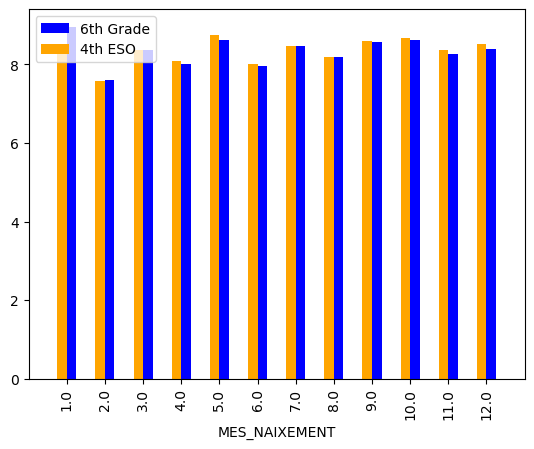

In [4]:
#ESTO ME DIBUJARÁ UNA GRÁFICA DE CUÁNTOS ALUMNOS HAN NACIDO EN CADA MES.
#NO SE USA PARA NADA, ERA MERA CURIOSIDAD ESTADÍSTICA.
meses_prim = primary_df.MES_NAIXEMENT
meses_sec = secondary_df.MES_NAIXEMENT

frec_meses_prim = meses_prim.value_counts(normalize=True).sort_index() *100
frec_meses_sec = meses_sec.value_counts(normalize=True).sort_index() *100



ax = frec_meses_prim.plot(kind='bar', color='blue', position=0, width=0.25, label='6th Grade')
frec_meses_sec.plot(kind='bar', color='orange', position=1, width=0.25, label='4th ESO', ax=ax)

plt.xlim((-1,12))
plt.legend()

In [6]:
#AQUÍ CALCULAREMOS LA MEDIA DE CADA ASIGNATURA DE ENTRE TODOS LOS ALUMNOS QUE HAYAN NACIDO EL MISMO MES.

meses = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]

primary_df['MES_NAIXEMENT'] = pd.Categorical(primary_df['MES_NAIXEMENT'], categories=meses, ordered=True)

# Calcular la media de cada asignatura por mes de nacimiento
media_por_mes_6 = primary_df.groupby('MES_NAIXEMENT')[["PCAT","PCAST","PANG","PMAT","PCIEN"]].mean()
media_por_mes_6.reset_index(inplace=True)

# Mostrar los resultados
print(media_por_mes_6)


   MES_NAIXEMENT       PCAT      PCAST       PANG       PMAT      PCIEN
0            1.0  77.040922  76.555681  78.052660  79.910916  73.836208
1            2.0  76.878943  76.285822  77.382856  79.626260  73.370813
2            3.0  76.530955  76.000049  77.160327  79.382520  73.141743
3            4.0  76.206093  75.620169  76.898484  79.153982  73.160059
4            5.0  75.909765  75.254935  76.594393  78.862811  72.165631
5            6.0  75.354745  74.701309  75.973188  78.308399  71.863826
6            7.0  74.969061  74.312994  75.547169  77.863681  71.227023
7            8.0  74.328357  73.669320  74.811763  77.192989  70.506443
8            9.0  74.126956  73.481079  74.616535  77.081570  70.239266
9           10.0  73.691159  73.020972  74.314611  76.633649  69.721259
10          11.0  73.193018  72.531054  73.776681  76.253455  69.491823
11          12.0  73.048541  72.354868  73.585215  76.147460  69.154249


In [7]:
#COMO ES UN POCO ENGORROSO HACERLO POR MESES, LO REPRESENTAREMOS POR TRIMESTRES.
primary_df['TRIMESTRE'] = pd.cut(primary_df['MES_NAIXEMENT'], bins=[0, 4, 7, 10, 13], labels=['T1', 'T2', 'T3', 'T4'])

media_por_trim_6 = primary_df.groupby('TRIMESTRE')[["PCAT", "PCAST", "PANG", "PMAT", "PCIEN"]].mean()

media_por_trim_6.reset_index(inplace=True)

print(media_por_trim_6)

  TRIMESTRE       PCAT      PCAST       PANG       PMAT      PCIEN
0        T1  76.670723  76.124332  77.390040  79.526705  73.381619
1        T2  75.415187  74.760297  76.042579  78.348695  71.750597
2        T3  74.043967  73.385603  74.576822  76.965426  70.146774
3        T4  73.120192  72.442299  73.680421  76.200016  69.321902


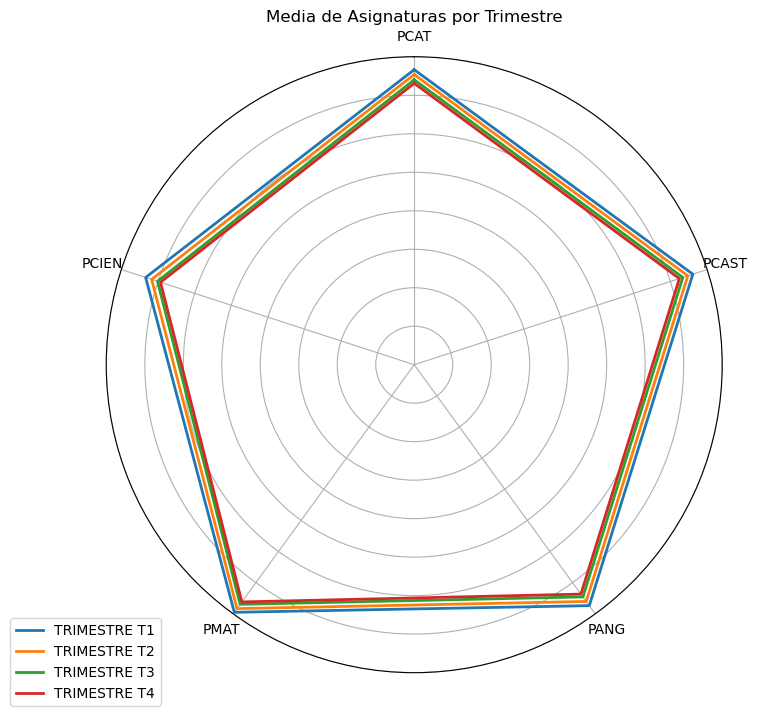

In [8]:
#PLOTEAREMOS LOS DATOS ANTERIORES

asignaturas = media_por_trim_6.columns[1:]
trimestres = media_por_trim_6['TRIMESTRE']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for i, trimestre in enumerate(trimestres):
    values = media_por_trim_6.loc[i, asignaturas].values
    angles = np.linspace(0, 2 * np.pi, len(asignaturas), endpoint=False)

    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'TRIMESTRE {trimestre}')
    #ax.fill(angles, values, alpha=0.4) #SI QUIERES EL GRÁFICO RELLENO, A MÍ ME GUSTA MÁS ASÍ


ax.set_xticks(angles[:-1])
ax.set_xticklabels(asignaturas)
ax.set_yticklabels([]) 
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Media de Asignaturas por Trimestre')
plt.show()


In [9]:
#AHORA HAREMOS LO MISMO PARA 4o ESO.
meses = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0]

secondary_df['MES_NAIXEMENT'] = pd.Categorical(secondary_df['MES_NAIXEMENT'], categories=meses, ordered=True)

# Calcular la media de cada asignatura por mes de nacimiento
media_por_mes_4 = secondary_df.groupby('MES_NAIXEMENT')[["PCAT","PCAST","PANG","PMAT","PCIEN"]].mean()
media_por_mes_4.reset_index(inplace=True)

# Mostrar los resultados
print(media_por_mes_4)


   MES_NAIXEMENT       PCAT      PCAST       PANG       PMAT      PCIEN
0            1.0  76.282356  77.546865  71.702174  69.216994  68.661500
1            2.0  76.305170  77.514544  71.685111  69.077310  68.509509
2            3.0  76.164361  77.446957  71.725503  69.119580  68.541584
3            4.0  76.055837  77.245683  71.505914  68.871255  68.119894
4            5.0  75.980612  77.201087  71.605003  68.922773  68.099281
5            6.0  75.540437  76.828045  70.689049  68.244757  67.554104
6            7.0  75.424023  76.702886  70.536460  67.899688  67.514158
7            8.0  74.941859  76.225626  69.829401  67.277228  66.910348
8            9.0  74.932603  76.248820  69.872931  67.408527  66.834468
9           10.0  74.677545  75.962727  69.757415  67.089463  66.598374
10          11.0  74.448630  75.708205  69.285343  66.789855  66.288623
11          12.0  74.431216  75.694761  69.302192  66.855608  66.209550


In [10]:
secondary_df['TRIMESTRE'] = pd.cut(secondary_df['MES_NAIXEMENT'], bins=[0, 4, 7, 10, 13], labels=['T1', 'T2', 'T3', 'T4'])
media_por_trim_4 = secondary_df.groupby('TRIMESTRE')[["PCAT", "PCAST", "PANG", "PMAT", "PCIEN"]].mean()
media_por_trim_4.reset_index(inplace=True)
print(media_por_trim_4)

  TRIMESTRE       PCAT      PCAST       PANG       PMAT      PCIEN
0        T1  76.200850  77.438526  71.655352  69.073093  68.460986
1        T2  75.653978  76.915472  70.956885  68.363917  67.730302
2        T3  74.848700  76.144119  69.819613  67.257618  66.778156
3        T4  74.439859  75.701428  69.293841  66.822984  66.249149


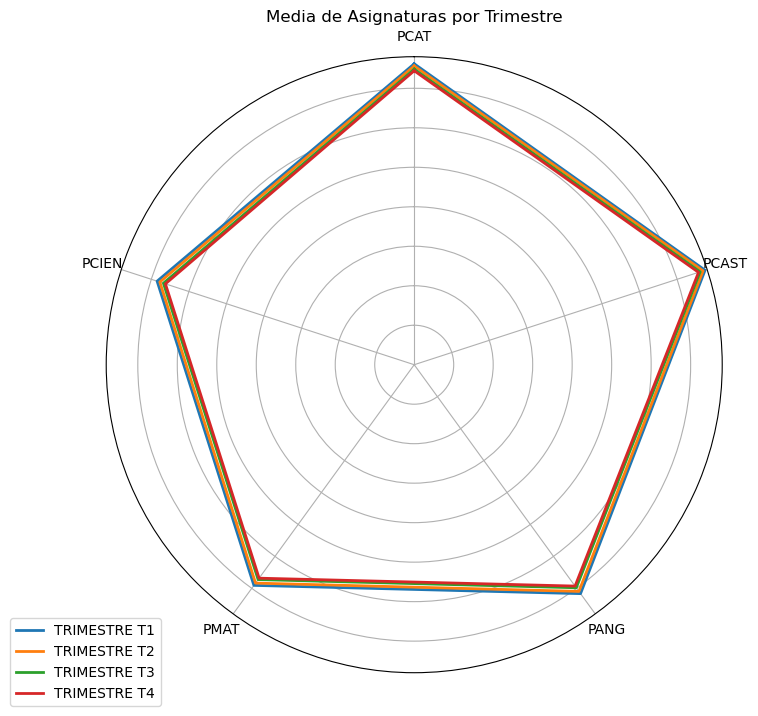

In [11]:
asignaturas = media_por_trim_4.columns[1:]
trimestres = media_por_trim_4['TRIMESTRE']
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
for i, trimestre in enumerate(trimestres):
    values = media_por_trim_4.loc[i, asignaturas].values
    angles = np.linspace(0, 2 * np.pi, len(asignaturas), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'TRIMESTRE {trimestre}')
    #ax.fill(angles, values, alpha=0.4)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(asignaturas)
ax.set_yticklabels([])  
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Media de Asignaturas por Trimestre')
plt.show()


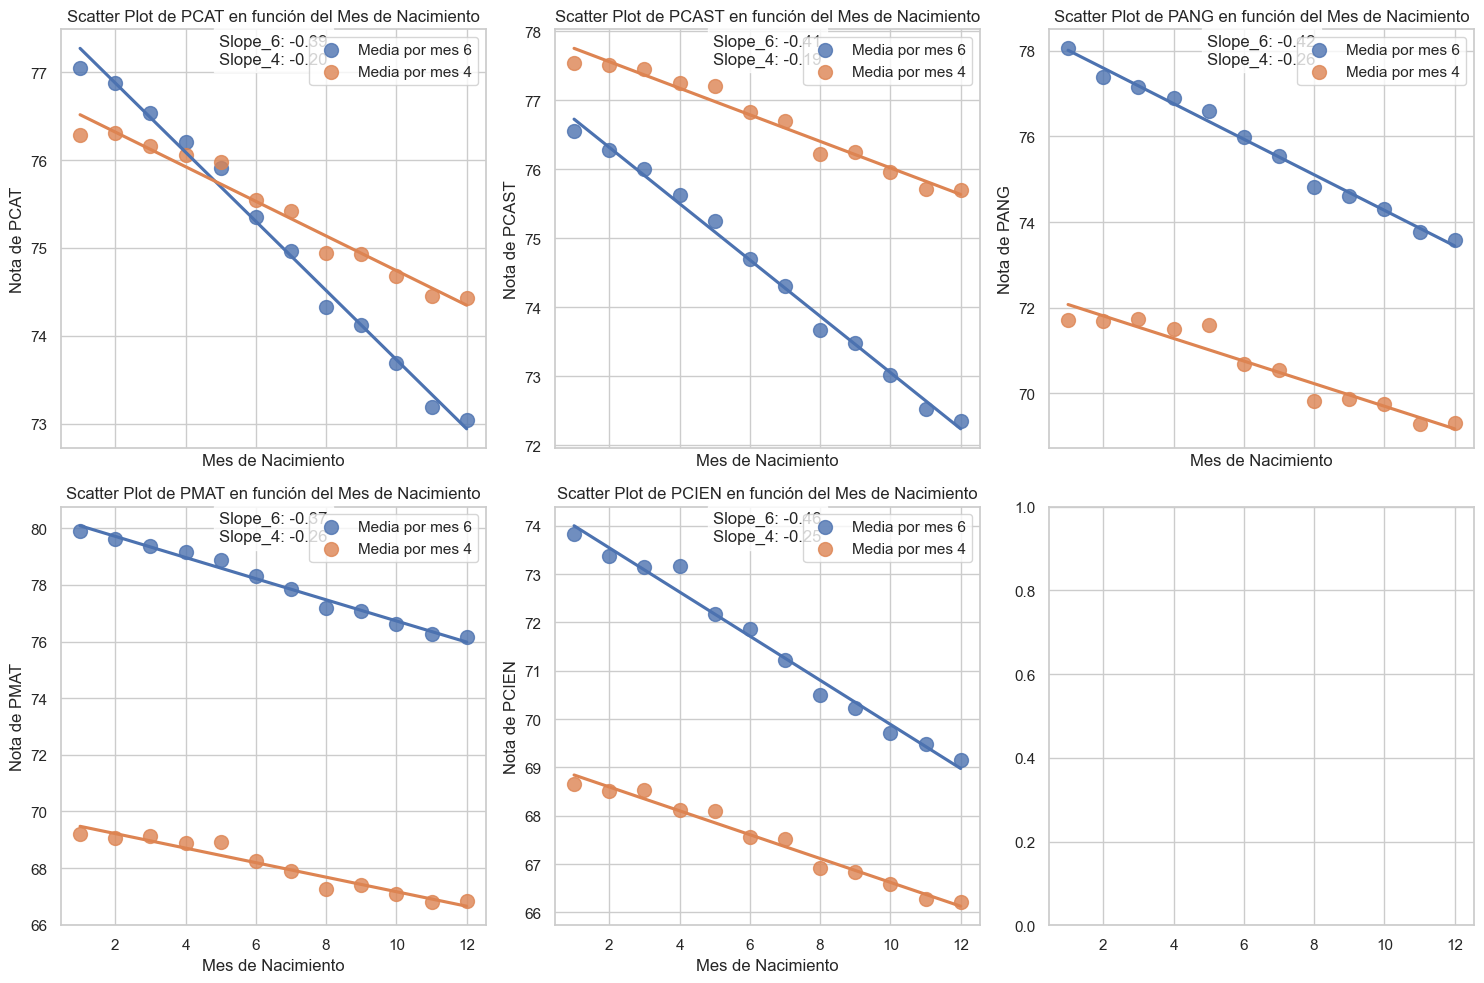

In [36]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True)

variables_y = ["PCAT", "PCAST", "PANG", "PMAT", "PCIEN"]

for i, variable_y in enumerate(variables_y):
    row = i // 3
    col = i % 3

    sns.regplot(x="MES_NAIXEMENT", y=variable_y, data=media_por_mes_6, scatter_kws={"s": 100}, ci=None, ax=axes[row, col], label="Media por mes 6")
    sns.regplot(x="MES_NAIXEMENT", y=variable_y, data=media_por_mes_4, scatter_kws={"s": 100}, ci=None, ax=axes[row, col], label="Media por mes 4")

    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(media_por_mes_6["MES_NAIXEMENT"], media_por_mes_6[variable_y])
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(media_por_mes_4["MES_NAIXEMENT"], media_por_mes_4[variable_y])

    axes[row, col].set_title(f"Scatter Plot de {variable_y} en función del Mes de Nacimiento")
    axes[row, col].set_xlabel("Mes de Nacimiento")
    axes[row, col].set_ylabel(f"Nota de {variable_y}")
    axes[row, col].text(0.5, 0.95, f'Slope_6: {slope1:.2f}\nSlope_4: {slope2:.2f}', transform=axes[row, col].transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))
    axes[row, col].legend()

plt.tight_layout()
plt.show()


###################################
###################################
###################################
###################################
###################################


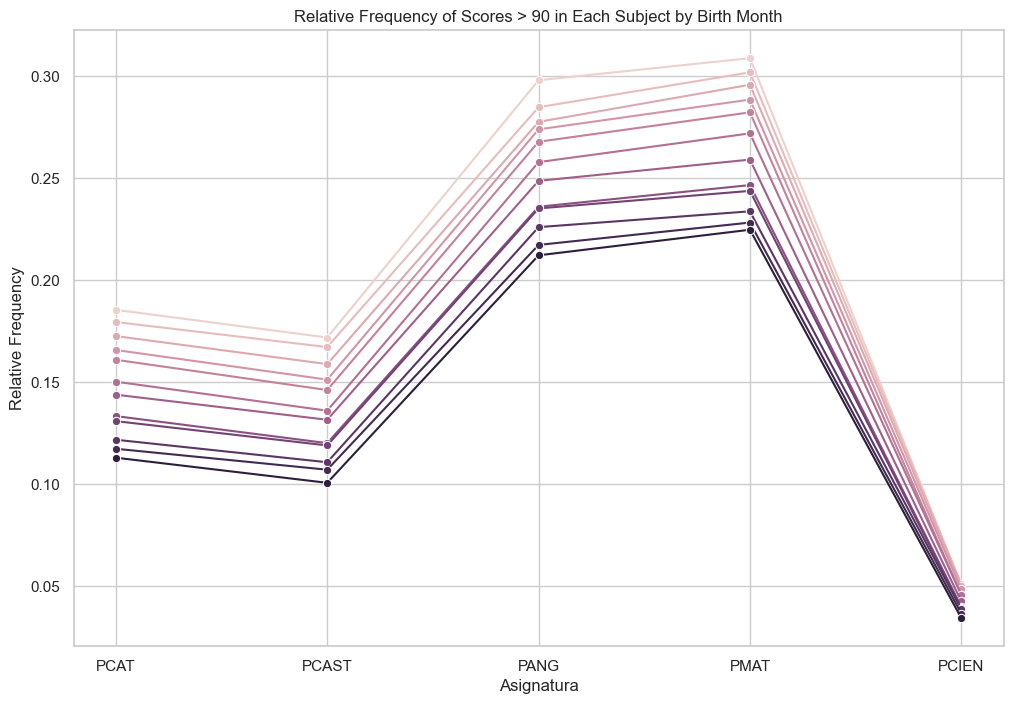

In [26]:
#NUESTRO ÚLTIMO GRÁFICO CALCULARÁ CUÁNTOS ALUMNOS SUPERAN LOS 90 PUNTOS EN CADA ASIGNATURA, DIFERENCIADOS POR MES.
df = primary_df
total_students_by_month = {}
for index, row in df.iterrows():
    month = row['MES_NAIXEMENT']
    total_students_by_month[month] = total_students_by_month.get(month, 0) + 1

asignaturas = ["PCAT","PCAST","PANG","PMAT","PCIEN"]
ribbon_data = {'Asignatura': [], 'Mes': [], 'Relative Frequency': []}

for asignatura in asignaturas:
    
    print("###################################")

    df_filtered = df[df[asignatura] > 90]
    month_counts = {}
    for index, row in df_filtered.iterrows():
        month = row['MES_NAIXEMENT']
        month_counts[month] = month_counts.get(month, 0) + 1

    month_counts = dict(sorted(month_counts.items()))


    for month, count in month_counts.items():
        total_students = total_students_by_month.get(month, 0)
        relative_frequency = count / total_students if total_students > 0 else 0
        #print(f"Mes {month}: {count} veces, Número de alumnos: {total_students}, Aparición Relativa: {relative_frequency:.2%}")
        ribbon_data['Asignatura'].append(asignatura)
        ribbon_data['Mes'].append(month)
        ribbon_data['Relative Frequency'].append(relative_frequency)

ribbon_df = pd.DataFrame(ribbon_data)
plt.figure(figsize=(12, 8))
sns.lineplot(data=ribbon_df, x='Asignatura', y='Relative Frequency', hue='Mes', marker='o', errorbar='sd')

plt.title('Relative Frequency of Scores > 90 in Each Subject by Birth Month')
plt.xlabel('Asignatura')
plt.ylabel('Relative Frequency')

plt.legend().set_visible(False)
plt.show()

###################################
###################################
###################################
###################################
###################################


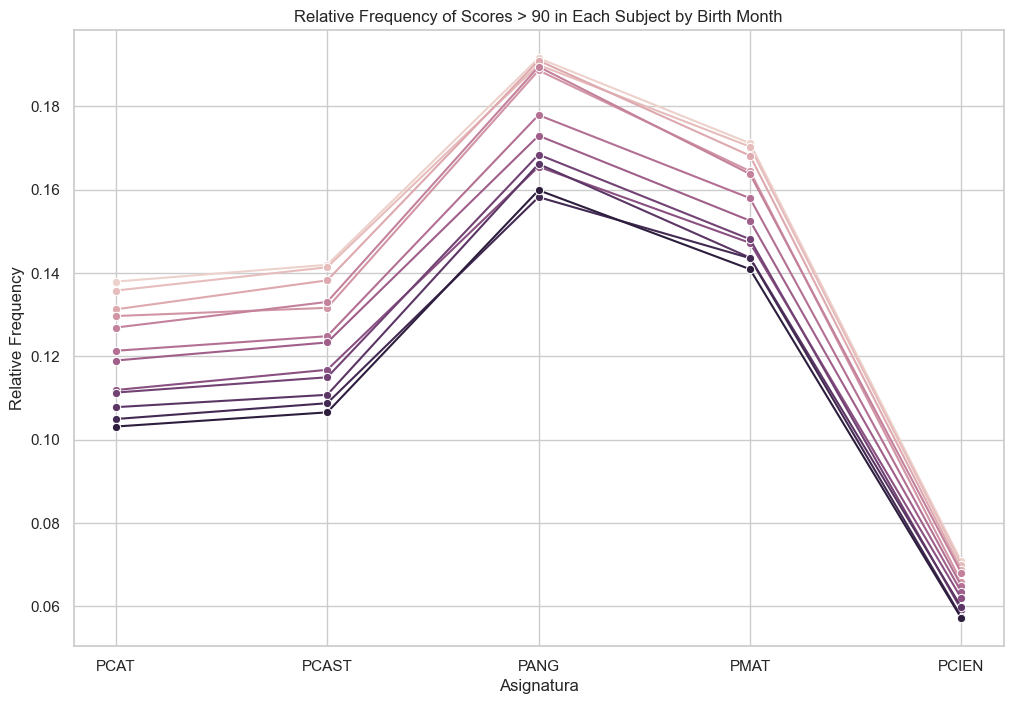

In [25]:
df = secondary_df
total_students_by_month = {}

for index, row in df.iterrows():
    month = row['MES_NAIXEMENT']
    total_students_by_month[month] = total_students_by_month.get(month, 0) + 1

asignaturas = ["PCAT","PCAST","PANG","PMAT","PCIEN"]
ribbon_data = {'Asignatura': [], 'Mes': [], 'Relative Frequency': []}

for asignatura in asignaturas:
    
    print("###################################")

    df_filtered = df[df[asignatura] > 90]
    month_counts = {}

    for index, row in df_filtered.iterrows():
        month = row['MES_NAIXEMENT']

        month_counts[month] = month_counts.get(month, 0) + 1

    month_counts = dict(sorted(month_counts.items()))
    month_counts.popitem() #PARECE SER QUE ALGUNOS ALUMNOS NO TENÍAN PUESTO EL MES DE NACIMIENTO Y APARECIAN UNOS NaN.
    # NO SE HAN TENIDO EN CUENTA


    for month, count in month_counts.items():
        total_students = total_students_by_month.get(month, 0)
        relative_frequency = count / total_students if total_students > 0 else 0
        #print(f"Mes {month}: {count} veces, Número de alumnos: {total_students}, Aparición Relativa: {relative_frequency:.2%}")
        ribbon_data['Asignatura'].append(asignatura)
        ribbon_data['Mes'].append(month)
        ribbon_data['Relative Frequency'].append(relative_frequency)


ribbon_df = pd.DataFrame(ribbon_data)
plt.figure(figsize=(12, 8))
sns.lineplot(data=ribbon_df, x='Asignatura', y='Relative Frequency', hue='Mes', marker='o', errorbar='sd')
plt.title('Relative Frequency of Scores > 90 in Each Subject by Birth Month')
plt.xlabel('Asignatura')
plt.ylabel('Relative Frequency')
plt.legend().set_visible(False)
plt.show()